🚀 COVID-19 Dataset Analysis – Exploring Global Trends


In [12]:
import pandas as pd

df = pd.read_csv(r'c:\Users\acer\Documents\dataset\archive\covid_19_data.csv')



In [2]:
daily = df.groupby('ObservationDate')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()


# Cumulative Global Trend (Line Chart)

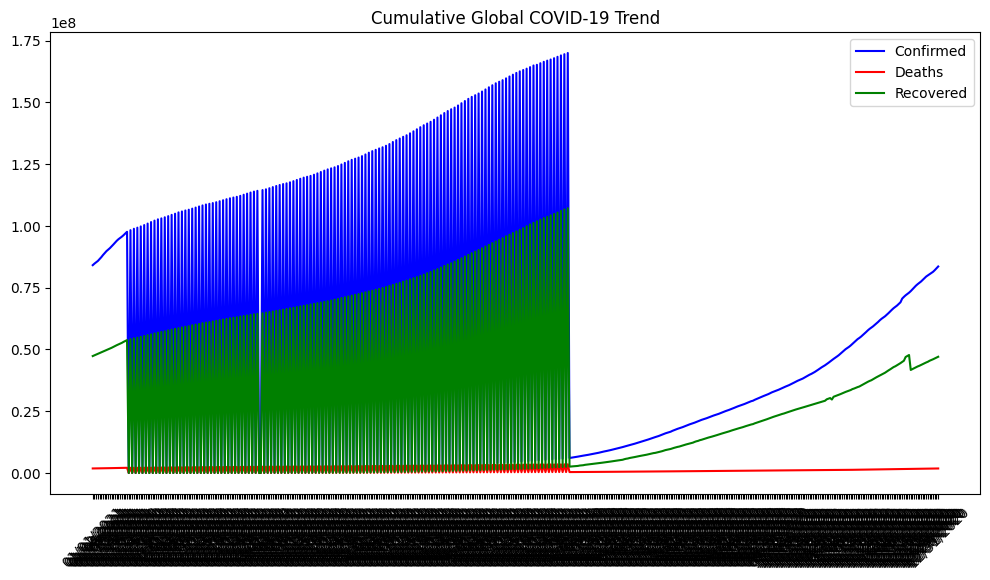

In [4]:

import matplotlib.pyplot as plt

daily = df.groupby('ObservationDate')[['Confirmed','Deaths','Recovered']].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(daily['ObservationDate'], daily['Confirmed'], label='Confirmed', color='blue')
plt.plot(daily['ObservationDate'], daily['Deaths'], label='Deaths', color='red')
plt.plot(daily['ObservationDate'], daily['Recovered'], label='Recovered', color='green')
plt.legend()
plt.xticks(rotation=45)
plt.title('Cumulative Global COVID-19 Trend')
plt.show()


# Daily New Cases (Bar Chart)

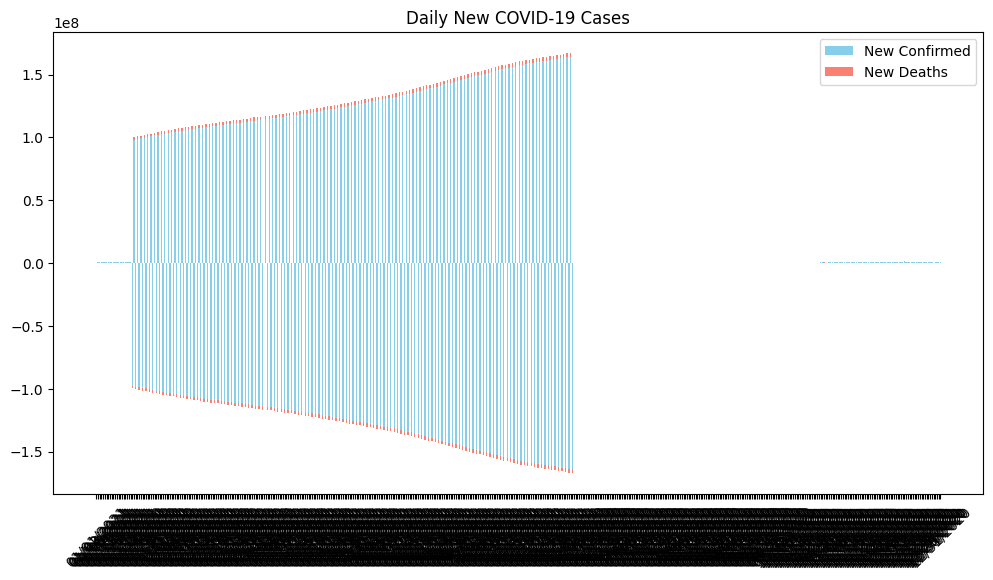

In [5]:
daily['NewConfirmed'] = daily['Confirmed'].diff().fillna(0)
daily['NewDeaths'] = daily['Deaths'].diff().fillna(0)
daily['NewRecovered'] = daily['Recovered'].diff().fillna(0)

plt.figure(figsize=(12,6))
plt.bar(daily['ObservationDate'], daily['NewConfirmed'], color='skyblue', label='New Confirmed')
plt.bar(daily['ObservationDate'], daily['NewDeaths'], color='salmon', label='New Deaths', bottom=daily['NewConfirmed'])
plt.xticks(rotation=45)
plt.title('Daily New COVID-19 Cases')
plt.legend()
plt.show()


# Top 10 Countries by Total Confirmed Cases (Horizontal Bar Chart)

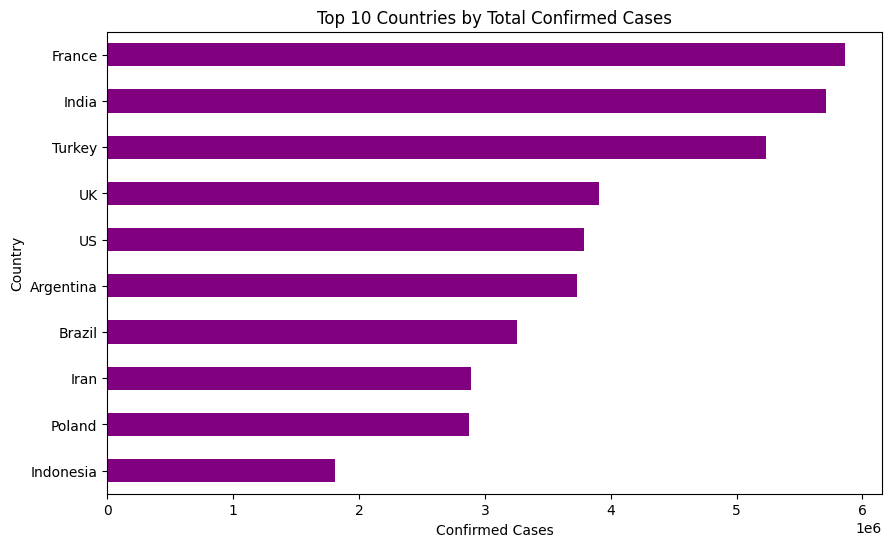

In [6]:
top_countries = df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_countries.plot(kind='barh', color='purple')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')
plt.title('Top 10 Countries by Total Confirmed Cases')
plt.gca().invert_yaxis()
plt.show()


# Proportion of Deaths vs Recovered Globally (Pie Chart)

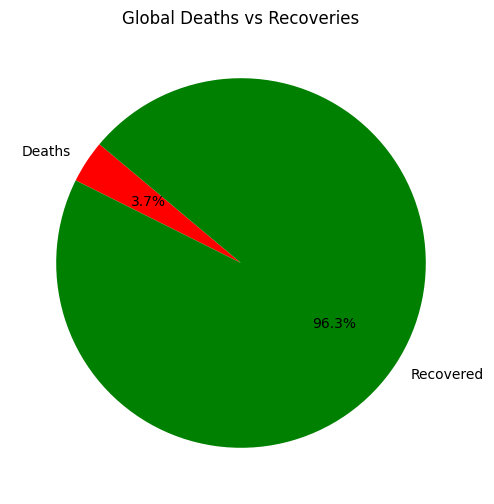

In [7]:
latest = daily.iloc[-1]
sizes = [latest['Deaths'], latest['Recovered']]
labels = ['Deaths', 'Recovered']
colors = ['red','green']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Global Deaths vs Recoveries')
plt.show()


# Stacked Area Chart – Confirmed, Deaths, Recovered Over Time

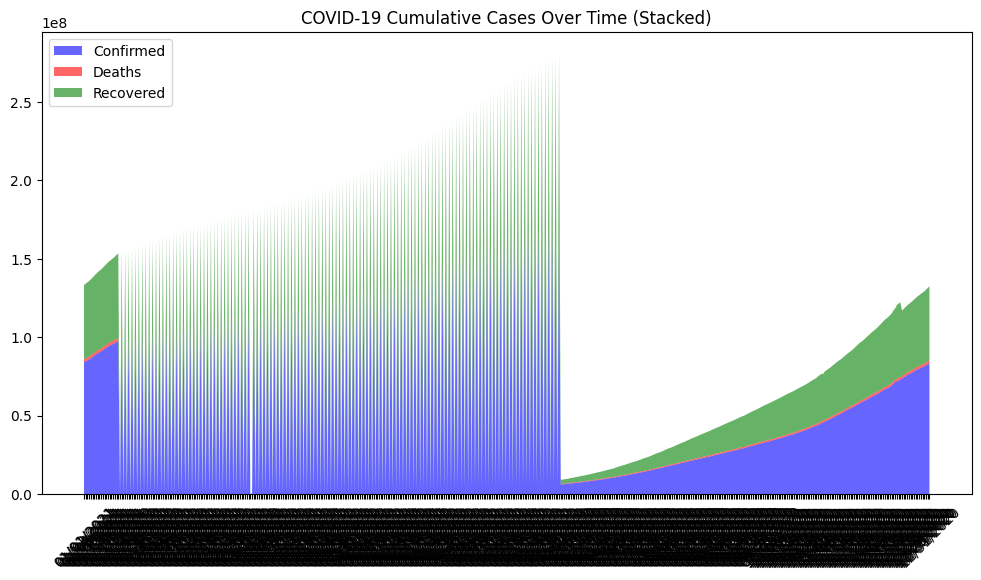

In [8]:
plt.figure(figsize=(12,6))
plt.stackplot(daily['ObservationDate'], daily['Confirmed'], daily['Deaths'], daily['Recovered'], 
              labels=['Confirmed','Deaths','Recovered'], colors=['blue','red','green'], alpha=0.6)
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('COVID-19 Cumulative Cases Over Time (Stacked)')
plt.show()


# Top 10 Countries Heatmap (Confirmed Cases)

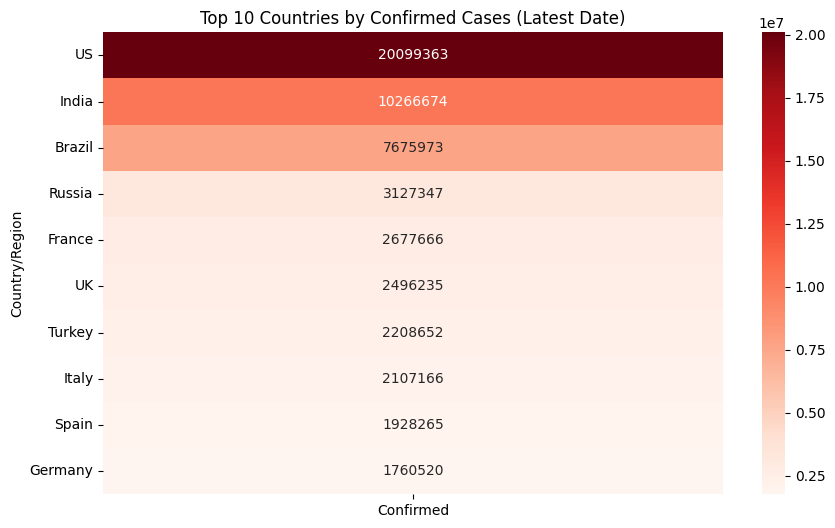

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

country_latest = df[df['ObservationDate'] == df['ObservationDate'].max()]
top10 = country_latest.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.heatmap(top10.to_frame().astype(int), annot=True, fmt='d', cmap='Reds')
plt.title('Top 10 Countries by Confirmed Cases (Latest Date)')
plt.show()


# Daily Cases Trend with Rolling Average (Line Chart)

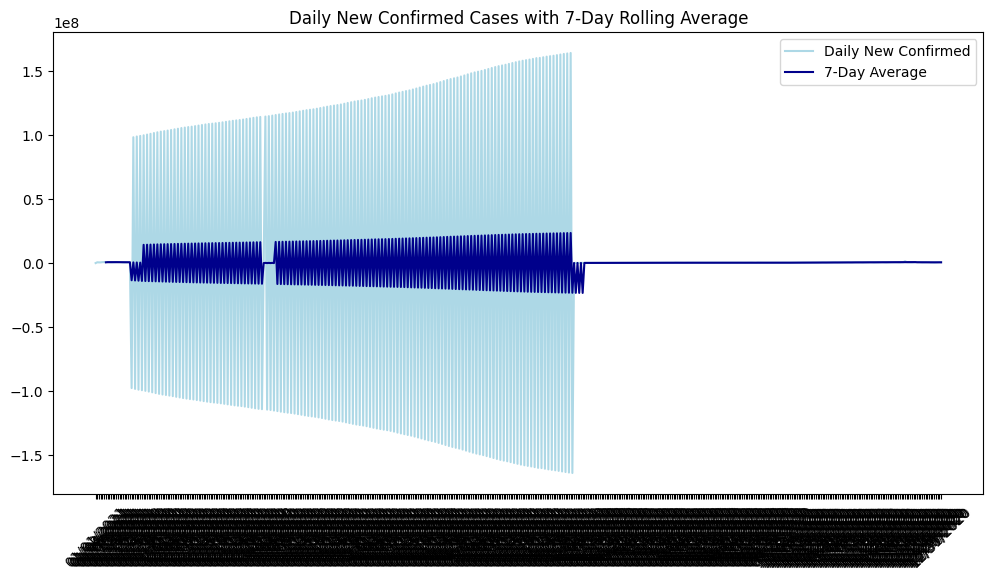

In [10]:
daily['NewConfirmed_7day'] = daily['NewConfirmed'].rolling(7).mean()

plt.figure(figsize=(12,6))
plt.plot(daily['ObservationDate'], daily['NewConfirmed'], color='lightblue', label='Daily New Confirmed')
plt.plot(daily['ObservationDate'], daily['NewConfirmed_7day'], color='darkblue', label='7-Day Average')
plt.legend()
plt.xticks(rotation=45)
plt.title('Daily New Confirmed Cases with 7-Day Rolling Average')
plt.show()
